In this post, I'm going to look at the explanatory features in the dataset. 

First, boilerplate:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.pylab.rcParams['figure.figsize'] = (10, 6)

Let's get our dataset, variables and functions from before.

In [2]:
data=pd.read_pickle("/home/soumya/research/insight/insight_project/modeling/data/dsm_data_scoped_variables.pkl")

In [3]:
variables=[]
with open("/home/soumya/research/insight/insight_project/modeling/code/dsm_exog_.txt","r") as f:
    lines=f.readlines()
    for line in lines:
        variables.append(line.strip().upper())
for variable in variables:
    print(variable)

AGE_AS_OF_12/31/13_(EDITED/IMPUTED)
SEX
RACE/ETHNICITY_(EDITED/IMPUTED)
MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)
FAMILY'S_TOTAL_INCOME
ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3
HIGH_BLOOD_PRESSURE_DIAG_(>17)
CORONARY_HRT_DISEASE_DIAG_(>17)
AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE
MULT_DIAG_HIGH_BLOOD_PRESS_(>17)
AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE
ANGINA_DIAGNOSIS_(>17)
AGE_OF_DIAGNOSIS-ANGINA
HEART_ATTACK_(MI)_DIAG_(>17)
AGE_OF_DIAGNOSIS-HEART_ATTACK(MI)
OTHER_HEART_DISEASE_DIAG_(>17)
AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE
STROKE_DIAGNOSIS_(>17)
AGE_OF_DIAGNOSIS-STROKE
EMPHYSEMA_DIAGNOSIS_(>17)
AGE_OF_DIAGNOSIS-EMPHYSEMA
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R3/1
CHRONC_BRONCHITS_LAST_12_MTHS_(>17)-R5/3
HIGH_CHOLESTEROL_DIAGNOSIS_(>17)
AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL
CANCER_DIAGNOSIS_(>17)
CANCER_DIAGNOSED_-_BLADDER_(>17)
CANCER_DIAGNOSED_-_BREAST_(>17)
CANCER_DIAGNOSED_-_CERVIX_(>17)
CANCER_DIAGNOSED_-_COLON_(>17)
CANCER_DIAGNOSED_-_LUNG_(>17)
CANCER_DIAGNOSED_-_LYMPHOMA_(>17)
CANCER_DIAGNO

In [4]:
interpretation={}

interpretation["categorical"]={
                1: "Yes",
                2: "No",
                -1: "Inapplicable",
                -2: "Determined in previous round",
                -7: "Refused",
                -8: "Don't know",
                -9: "Not ascertained",
                -10: "HOURLY WAGE >= $76.96",
                -13: "INITIAL WAGE IMPUTED"
                }

interpretation["RACE/ETHNICITY_(EDITED/IMPUTED)"]={1: "HISPANIC",
                        2: "NON-HISPANIC WHITE ONLY",
                        3: "NON-HISPANIC BLACK ONLY",
                        4: "NON-HISPANIC ASIAN ONLY",
                        5: "NON-HISPANIC OTHER RACE OR MULTIPLE RACE"
                        }

interpretation["SEX"]={1: "MALE", 2: "FEMALE"}

interpretation["MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)"]={-9: "NOT ASCERTAINED",
                           -8: "DK",
                           -7: "REFUSED",
                           1: "MARRIED",
                           2: "WIDOWED",
                           3: "DIVORCED",
                           4: "SEPARATED",
                           5: "NEVER MARRIED",
                           6: "UNDER 16 - INAPPLICABLE"
                          }

interpretation["EDUCATION_RECODE_(EDITED)"]={-9: "NOT ASCERTAINED",
                             -8: "DK",
                             -7: "REFUSED",
                             -1: "INAPPLICABLE OR UNDER 5",
                             1: "LESS THAN/EQUAL TO 8TH GRADE",
                             2: "9 - 12TH GRADE, NO HS DIPLOMA OR GED",
                             13: "GED OR HS GRAD",
                             14: "BEYOND HS,COLLEGE(NO 4YR DEG),ASSOC DEG",
                             15: "4-YEAR COLLEGE DEGREE, BACHELOR'S DEGREE",
                             16: "MASTER'S, DOCTORATE, OR PROFESSIONAL DEG"
                             }

interpretation["INDUSTRY_GROUP_RD_3/1_CMJ"]={-9: "NOT ASCERTAINED",
                            -1: "INAPPLICABLE",
                            1: "NATURAL RESOURCES",
                            2: "MINING",
                            3: "CONSTRUCTION",
                            4: "MANUFACTURING",
                            5: "WHOLESALE AND RETAIL TRADE",
                            6: "TRANSPORTATION AND UTILITIES",
                            7: "INFORMATION",
                            8: "FINANCIAL ACTIVITIES",
                            9: "PROFESSIONAL AND BUSINESS SERVICES",
                            10: "EDUCATION, HEALTH, AND SOCIAL SERVICES",
                            11: "LEISURE AND HOSPITALITY",
                            12: "OTHER SERVICES",
                            13: "PUBLIC ADMINISTRATION",
                            14: "MILITARY",
                            15: "UNCLASSIFIABLE INDUSTRY"}

interpretation["OCCUPATION_GROUP_RD_3/1_CMJ"]={
    -9: "NOT ASCERTAINED",
    -1: "INAPPLICABLE",
    1: "MANAGEMENT, BUSINESS, AND FINANCIAL OPER",
    2: "PROFESSIONAL AND RELATED OCCUPATIONS", 
    3: "SERVICE OCCUPATIONS",
    4: "SALES AND RELATED OCCUPATIONS", 
    5: "OFFICE AND ADMINISTRATIVE SUPPORT",
    6: "FARMING, FISHING, AND FORESTRY",
    7: "CONSTRUCTION, EXTRACTION, AND MAINTENANC",
    8: "PRODUCTION, TRNSPORTATION, MATRL MOVING", 
    9: "MILITARY SPECIFIC OCCUPATIONS",
    11: "UNCLASSIFIABLE OCCUPATION"}

interpretation["CENSUS_REGION_AS_OF_12/31/13"]={-1: "Inapplicable",
                                                1:"Northeast",
                                                2:"Midwest",
                                                3:"South",
                                                4:"West"}

interpretation["EMPLOYMENT_STATUS_RD_3/1"]={-9: "NOT ASCERTAINED",
                                            -8: "DK",
                                            -7: "REFUSED",
                                            -1: "INAPPLICABLE",
                                            1: "EMPLOYED AT RD 3/1 INT DATE",
                                            2: "JOB TO RETURN TO AT RD 3/1 INT DATE",
                                            3: "JOB DURING RD 3/1 REF PERIOD",
                                            4: "NOT EMPLOYED DURING RD 3/1"}

interpretation["FULL_YEAR_INSURANCE_COVERAGE_STATUS_2013"]={
     1: "<65 ANY PRIVATE",
     2: "<65 PUBLIC ONLY",
     3: "<65 UNINSURED",
     4: "65+ EDITED MEDICARE ONLY",
     5: "65+ EDITED MEDICARE AND PRIVATE",
     6: "65+ EDITED MEDICARE AND OTH PUB ONLY",
     7: "65+ UNINSURED",
     8: "65+ NO MEDICARE AND ANY PUBLIC/PRIVATE"
    }



In [5]:
def interpret_vectorized(data,feature):
    if feature in interpretation:
        return data[feature].map(lambda x: interpretation[feature][x])
    elif feature in categorical:
        return data[feature].map(lambda x: interpretation["categorical"][x])
    else:
        return data[feature].map(lambda x: "inapplicable" if x<0 else x)

Next I'm going to prototype a function that will spit out the empirical distributions of each of the explanatory variables.

I'm going to have to treat categorical variables differently to continuous variables.

One rough and ready way to break out the categorical variables is to check how many levels that feature has in the dataset - if there are relatively few (say below a threshold of 10 or 20), I'll assume the feature is categorical, and otherwise I'll assume it's continuous. To deal with some of the edge cases, it's easy to note that anything involving an age, or a # of visits should be continuous.

Let's see if this works.

In [6]:
def check_discrete(data,thevariable):
    if len(data[thevariable].unique())>19 or "AGE_OF" in thevariable or "AGE_AS" in thevariable or "#" in thevariable:
        return "continuous"
    else:
        return "categorical"

Let's see if this gave us what we wanted.

In [7]:
print("Continuous features\n\n")
continuous=[term for term in variables if check_discrete(data,term)=="continuous"]
for term in continuous:
    print(term)
print("\n\n\n")
print("Categorical features\n\n")
categorical=[term for term in variables if check_discrete(data,term)=="categorical"]
for term in categorical:
    print(term)

Continuous features


AGE_AS_OF_12/31/13_(EDITED/IMPUTED)
FAMILY'S_TOTAL_INCOME
ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3
AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE
AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE
AGE_OF_DIAGNOSIS-ANGINA
AGE_OF_DIAGNOSIS-HEART_ATTACK(MI)
AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE
AGE_OF_DIAGNOSIS-STROKE
AGE_OF_DIAGNOSIS-EMPHYSEMA
AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL
AGE_OF_DIAGNOSIS-DIABETES
AGE_OF_DIAGNOSIS-ARTHRITIS
AGE_OF_DIAGNOSIS-ASTHMA
AGE_OF_DIAGNOSIS-ADHD/ADD
#_WKS/MON_WOUT_HLTH_INS_PRV_YR-PN_18_ONL
#_OFFICE-BASED_PROVIDER_VISITS_13
#_OUTPATIENT_DEPT_PROVIDER_VISITS_13
#_EMERGENCY_ROOM_VISITS_13
#_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013
FINAL_PERSON_WEIGHT_2013
TOTAL_OFFICE-BASED_EXP_13
TOTAL_OUTPATIENT_PROVIDER_EXP_13
TOT_HOSP_IP_FACILITY_+_DR_EXP_13
TOTAL_ER_FACILITY_+_DR_EXP_13




Categorical features


SEX
RACE/ETHNICITY_(EDITED/IMPUTED)
MARITAL_STATUS-12/31/13_(EDITED/IMPUTED)
HIGH_BLOOD_PRESSURE_DIAG_(>17)
CORONARY_HRT_DISEASE_DIAG_(>17)
MULT_DIAG_HIGH_BLOOD_PRESS_(>17)


Pretty good!

Next I'll prototype a function to produce bar plots for the categorical variables. Since the data points are weighted, I need to make sure I scale each point out correctly before I aggregate under each label as well.

Here's the function:

In [8]:
def explore(data,thevar):
    temp=interpret_vectorized(data,thevar)
    w=data["FINAL_PERSON_WEIGHT_2013"]
    temp=pd.concat([temp,w],axis=1)
    temp["ones"]=1
    temp["scaled"]=temp["ones"]*temp["FINAL_PERSON_WEIGHT_2013"]
    result=temp.groupby([thevar])["scaled"].sum()
    ax=result.plot(kind="bar",title=thevar)
    ax.set_ylabel("Count")
    plt.show()

The categorical features above split up nicely into two groups that are interesting. The first consists of health status features, and the second consists of demographic and socioeconomic features. I'll group them accordingly:

In [9]:
health=[term for term in categorical if "DIAG" in term or 
        "LIMITATION" in term or
        "ASTHMA" in term or 
        "JOINT" in term or 
        "PEAK_FLOW" in term or
       "PREGNANT" in term or
       "ACUTE" in term or
       "BRONCH" in term]

demog=[term for term in categorical if term not in health]

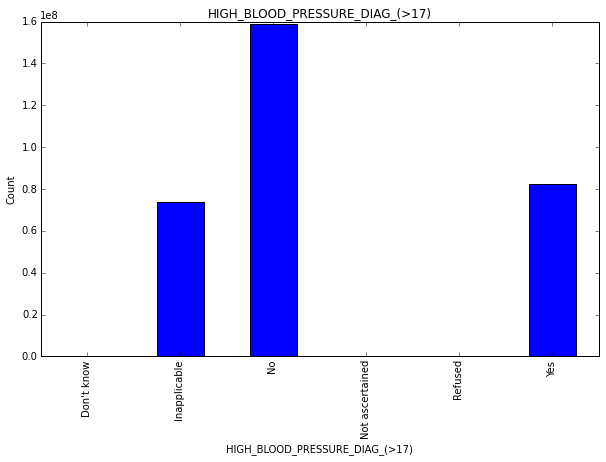

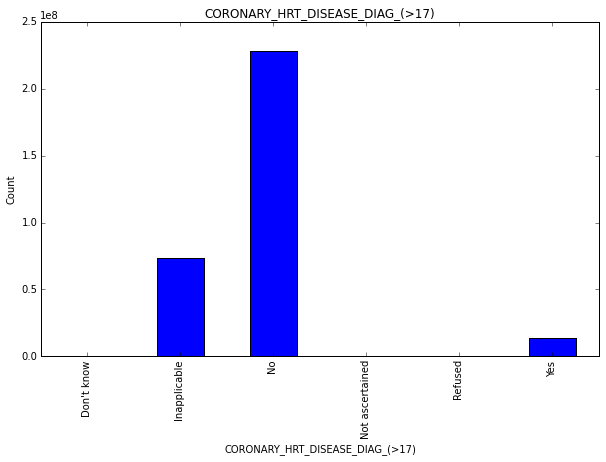

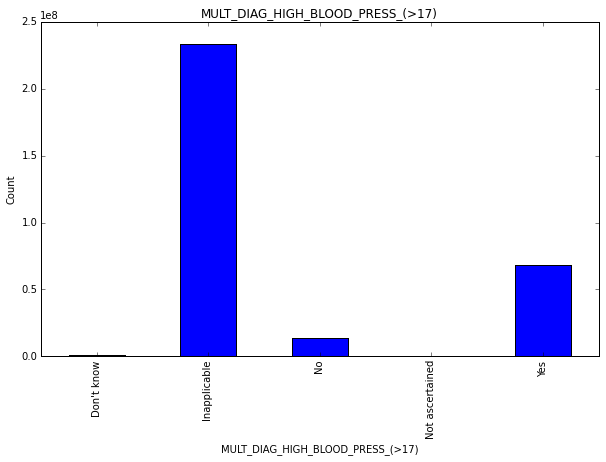

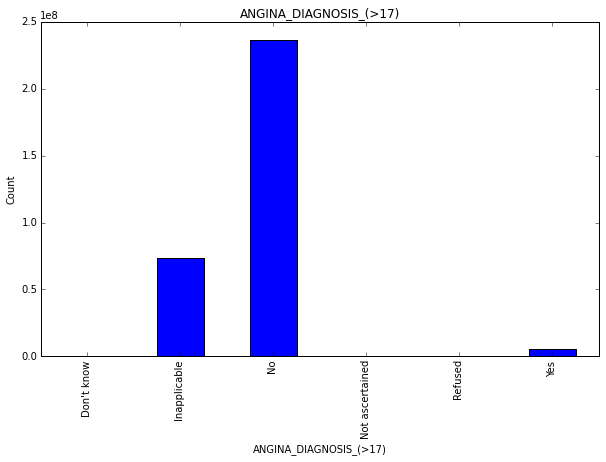

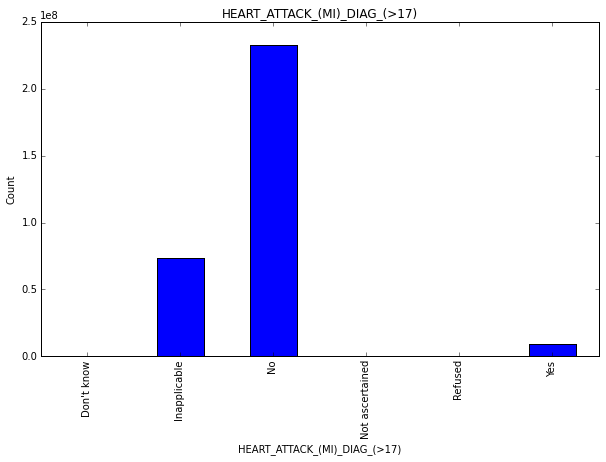

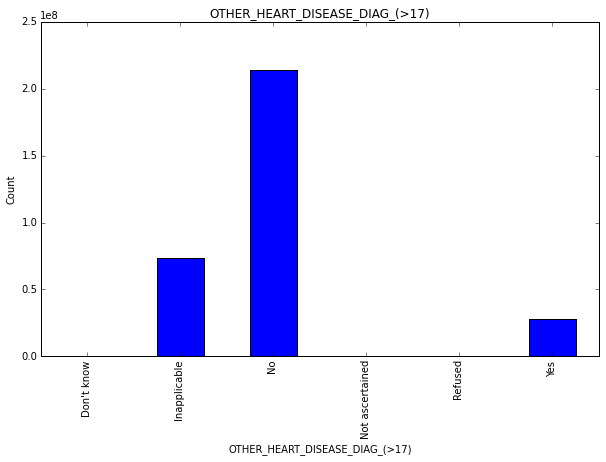

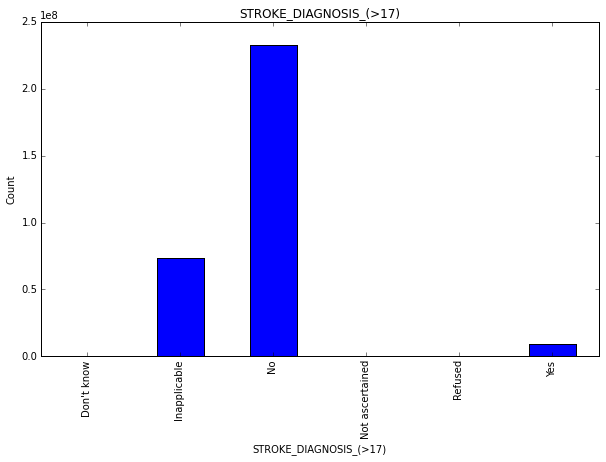

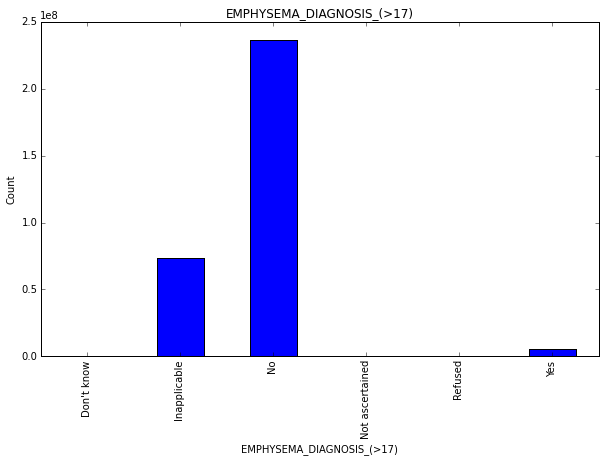

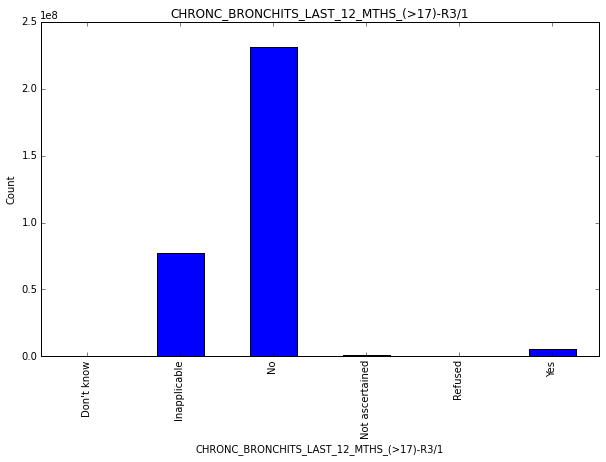

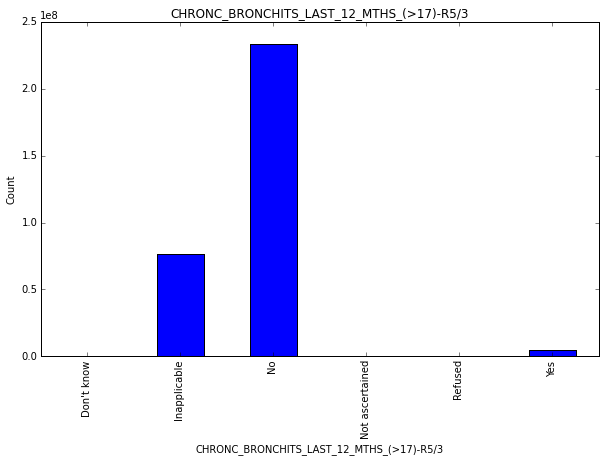

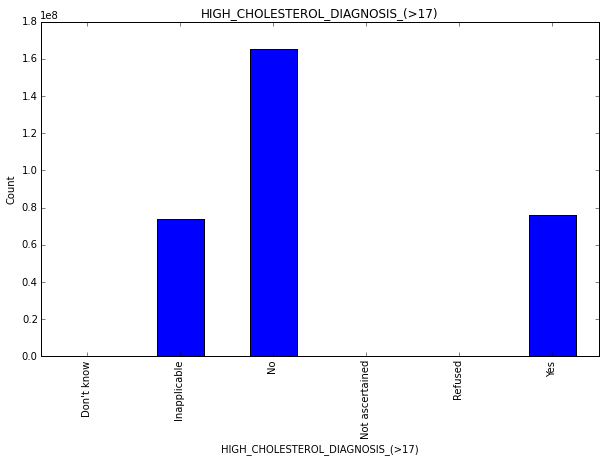

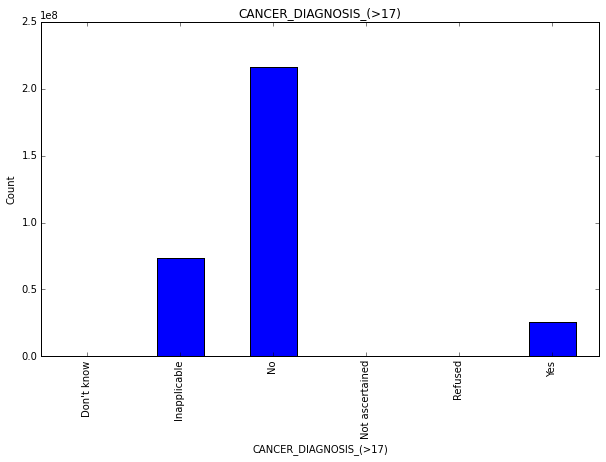

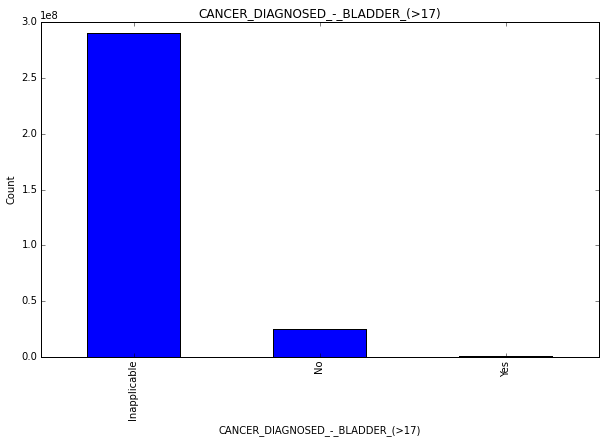

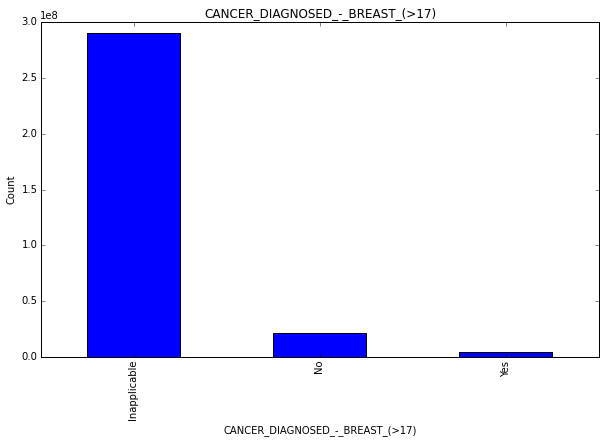

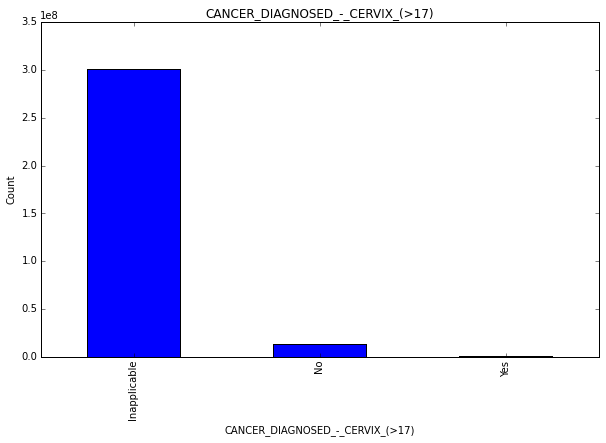

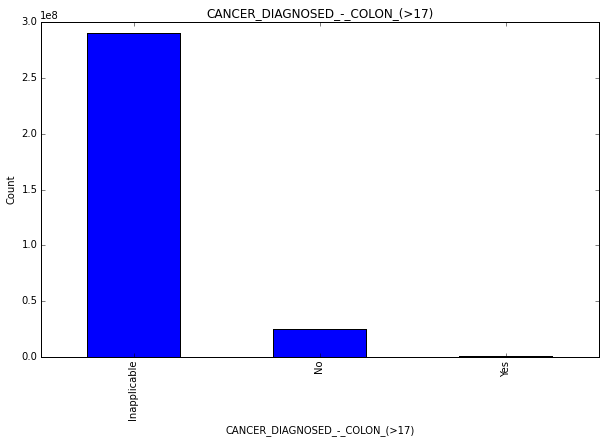

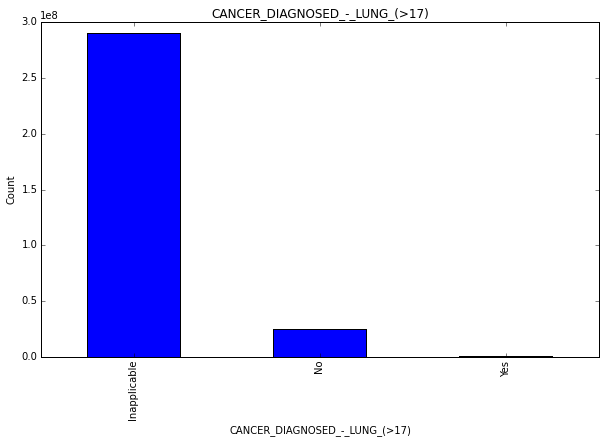

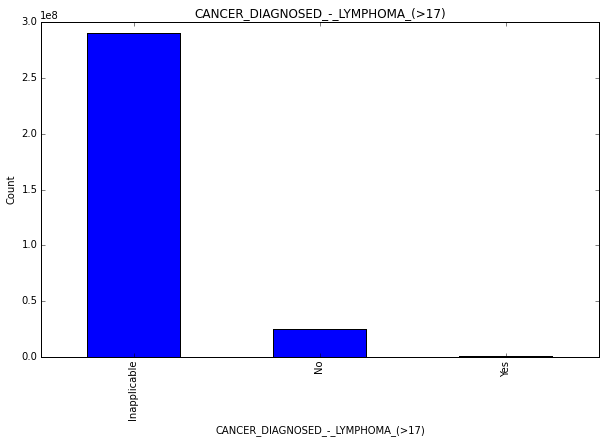

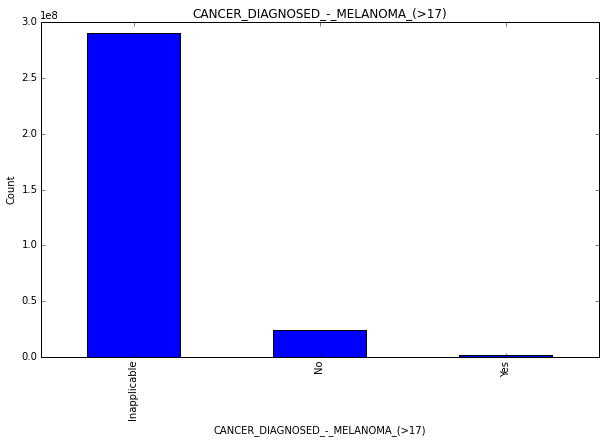

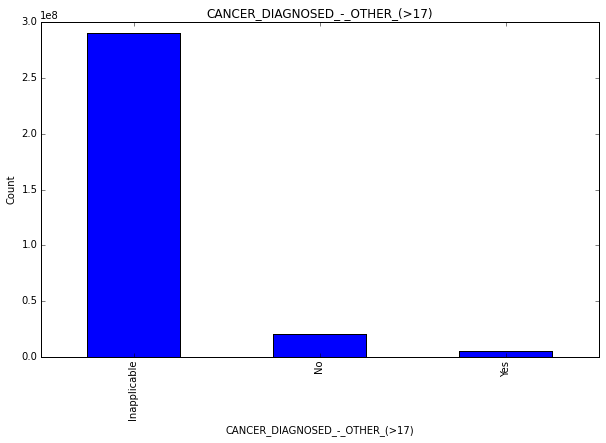

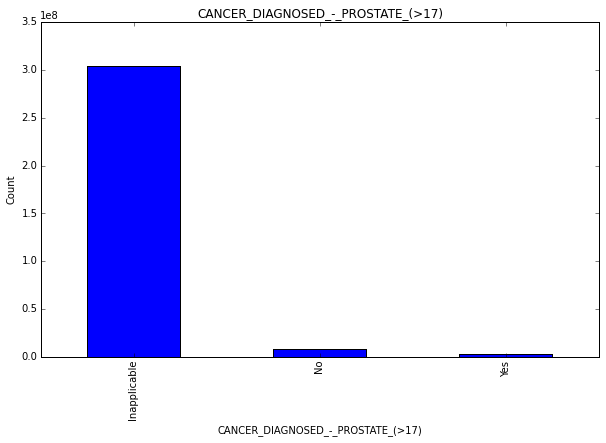

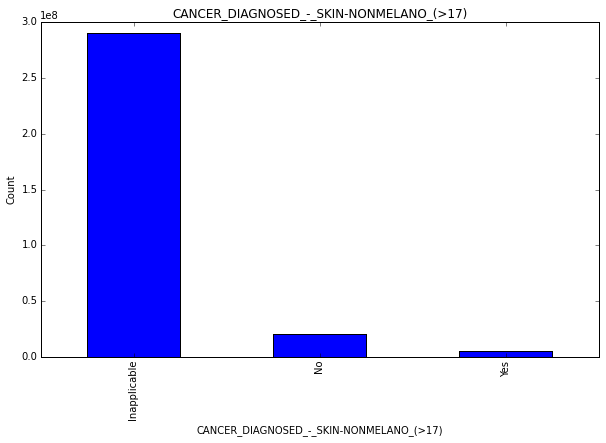

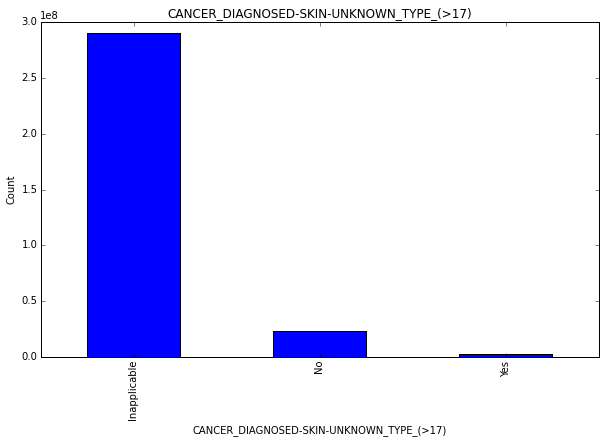

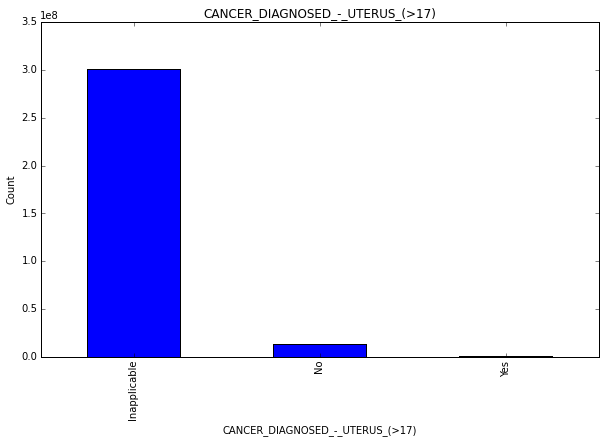

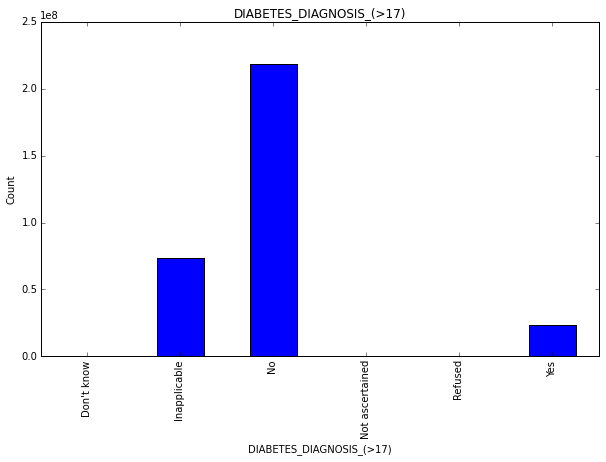

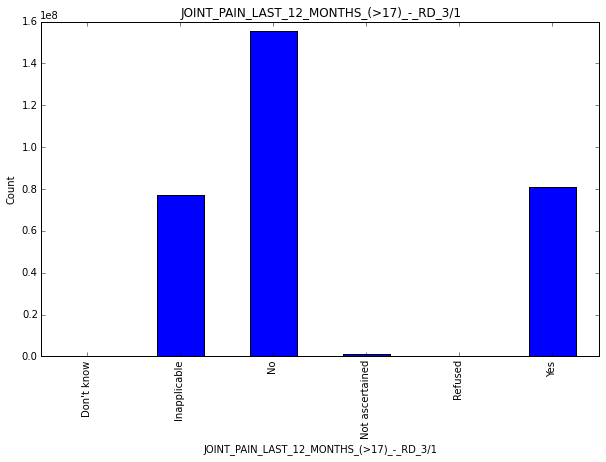

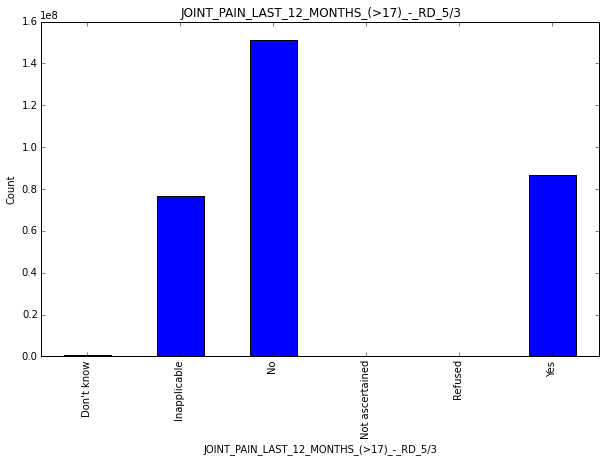

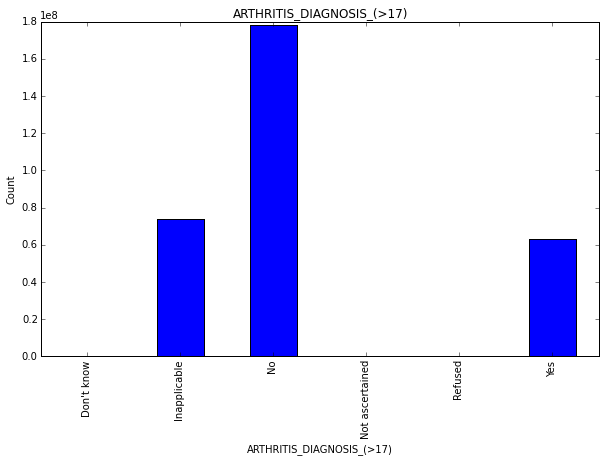

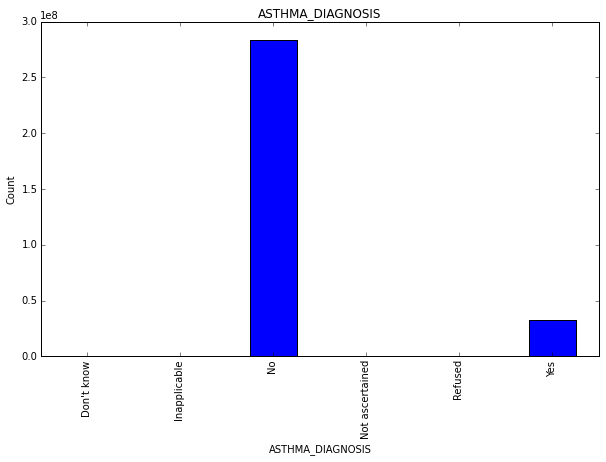

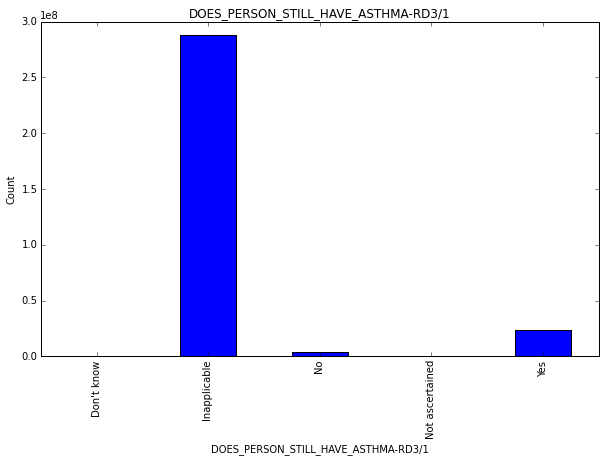

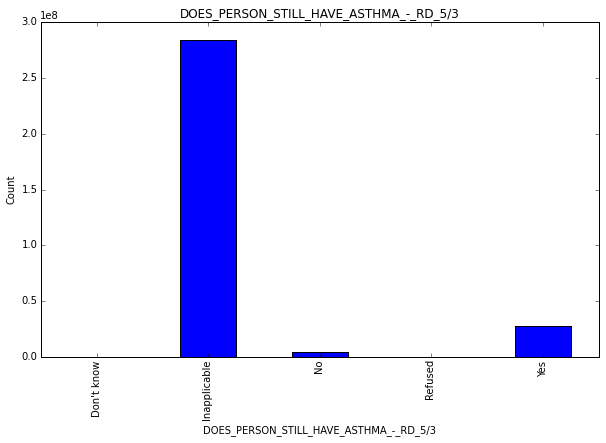

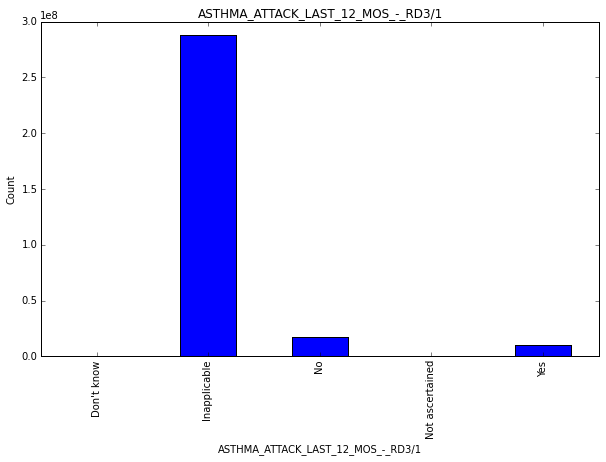

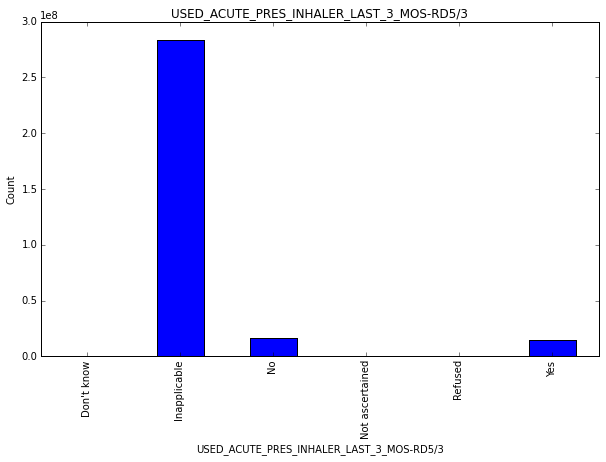

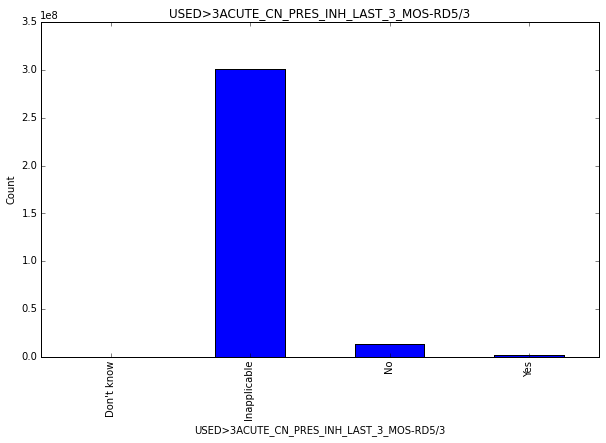

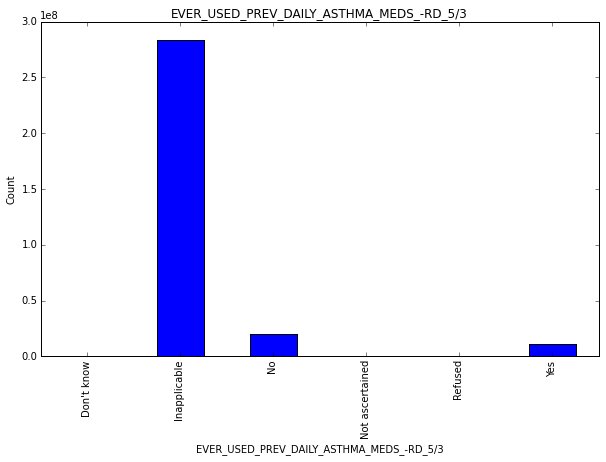

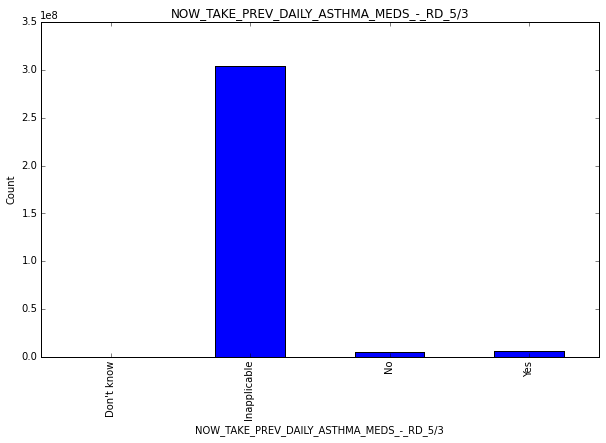

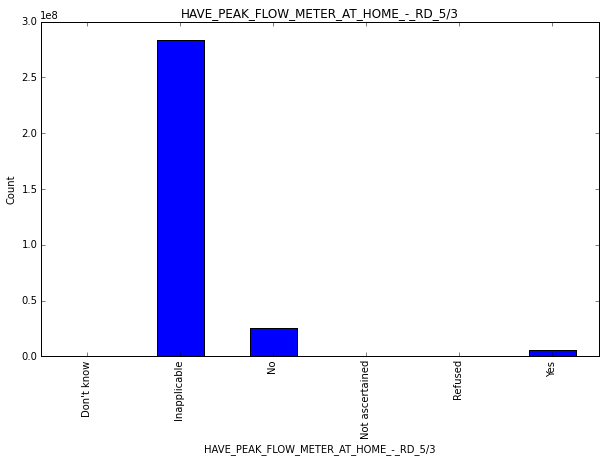

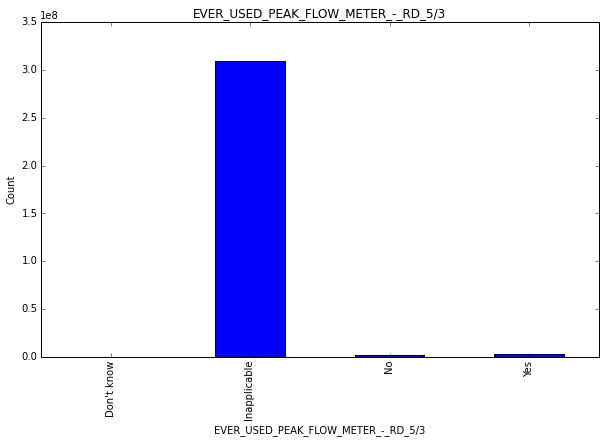

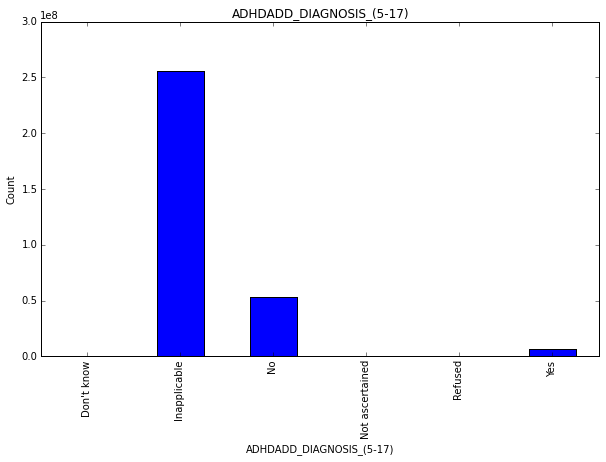

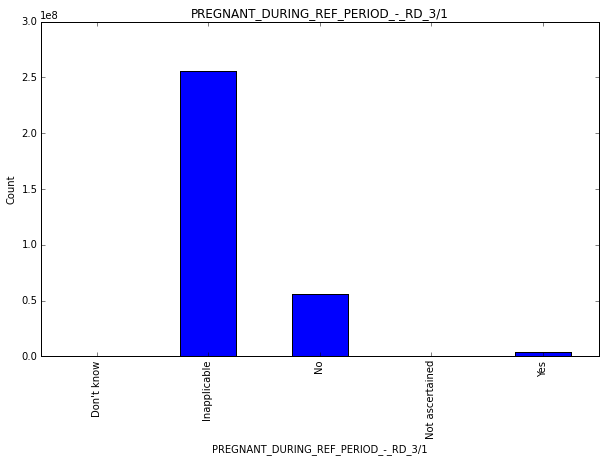

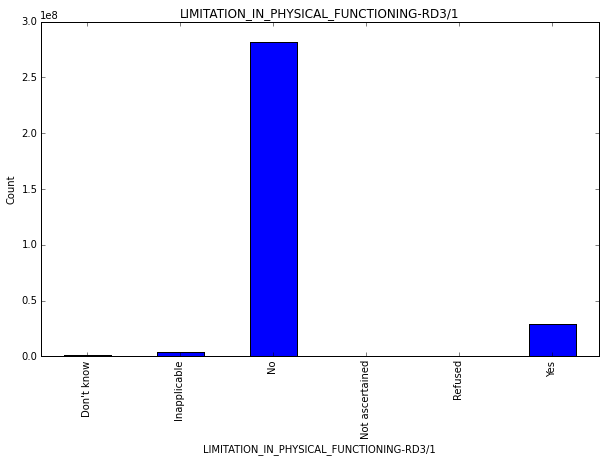

In [10]:
for term in health:
    explore(data,term)

Here are a few observations about these health status features:

1. High blood pressure, diabetes, high cholesterol, joint pain and arthritis are relatively common in the population.
2. Heart disease (angina, heart attack, etc) and stroke are less prevalent, but still substantial.
3. Ditto for lung disease (emphysema, bronchitis, asthma).
4. While a cancer diagnosis is relatively common, the individual cancer diagnoses have very low mass in the "yes" bucket. This will likely pose a problem for estimating models, unless we either upsample, or otherwise penalize the other responses. Including these features in our model may be informative if different cancers affect expenditure in different ways, but we'll have to balance this against the lack of reliability of parameter estimates that we'll get from these features. Unless we have a good reason to believe that different cancers cost very different amounts to treat, we may be best off using the aggregate cancer diagnosis feature, and dropping the individual diagnosis features.
5. Practically no-one uses a peak flow meter.
6. There's relatively incidence of ADD/ADHD in the population.
7. Relatively few people are pregnant at the time of the survey. 
8. General limitation in physical functioning is fairly prevalent.



Next let's look at the demographic and socio-economic features.

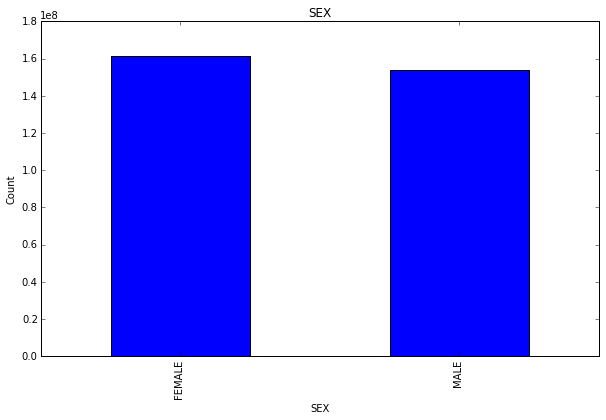

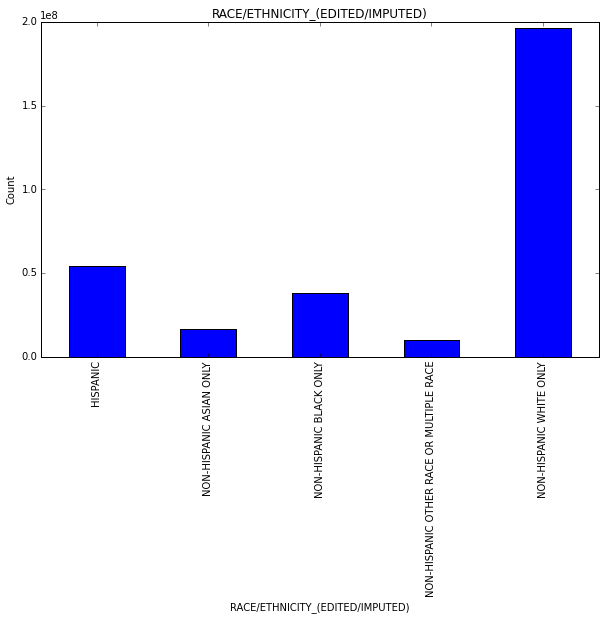

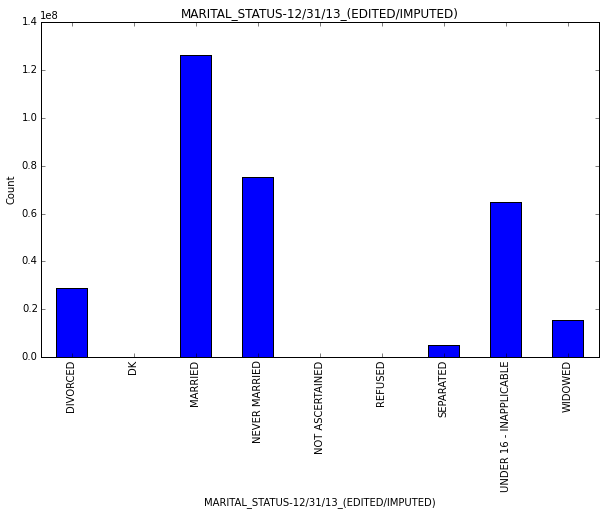

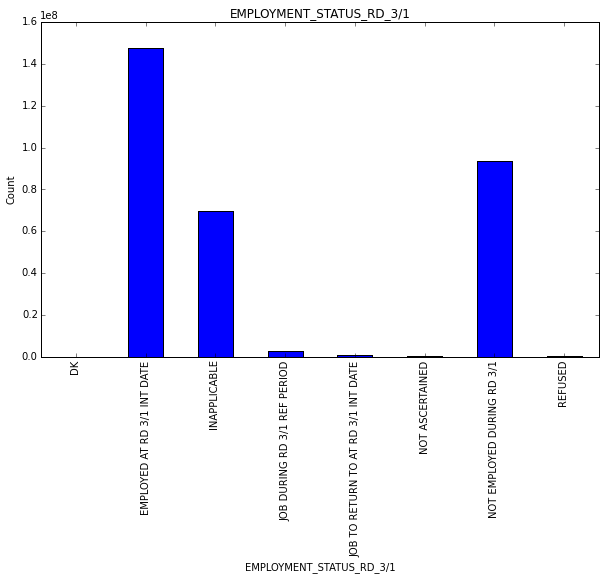

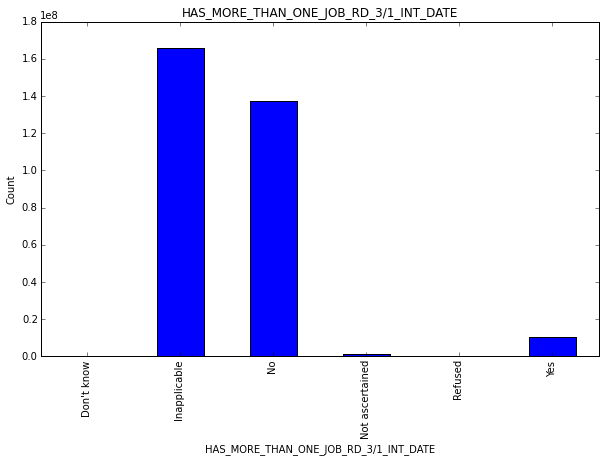

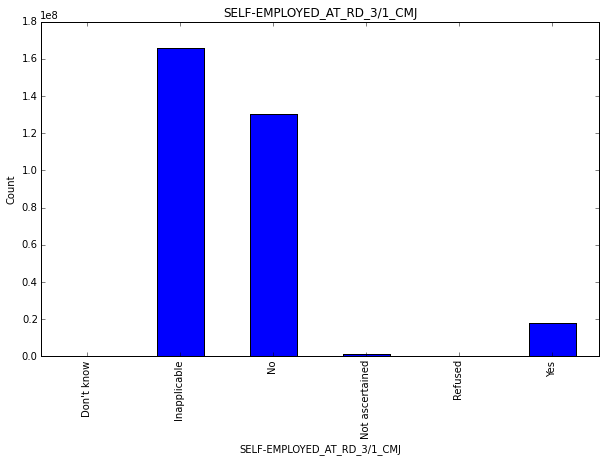

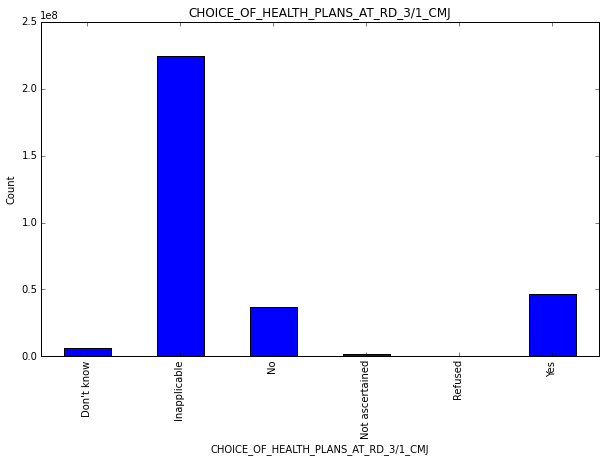

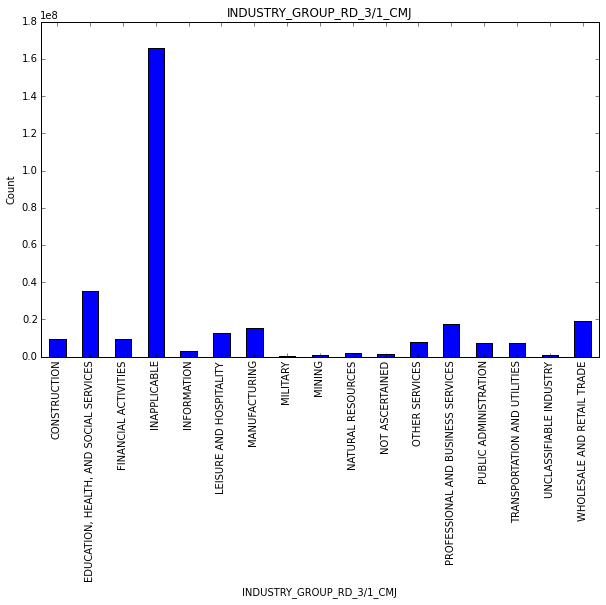

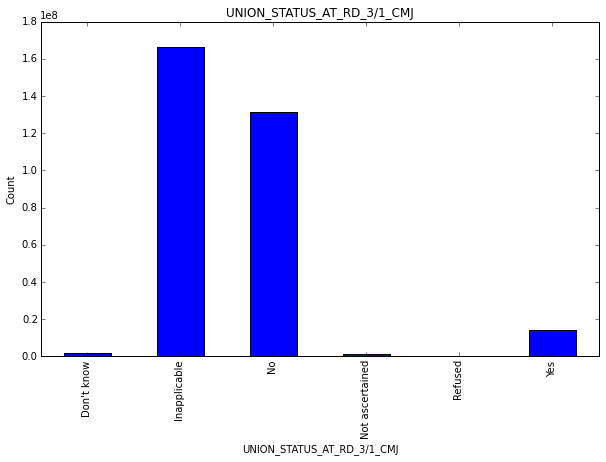

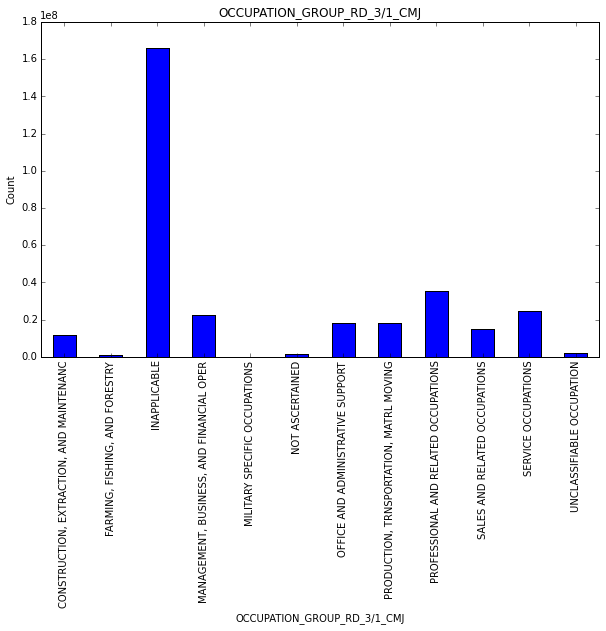

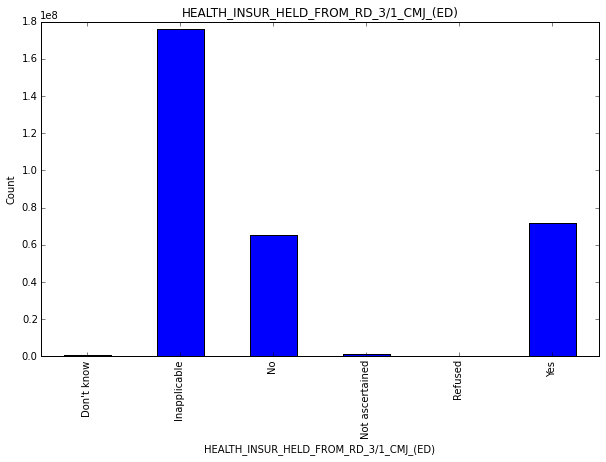

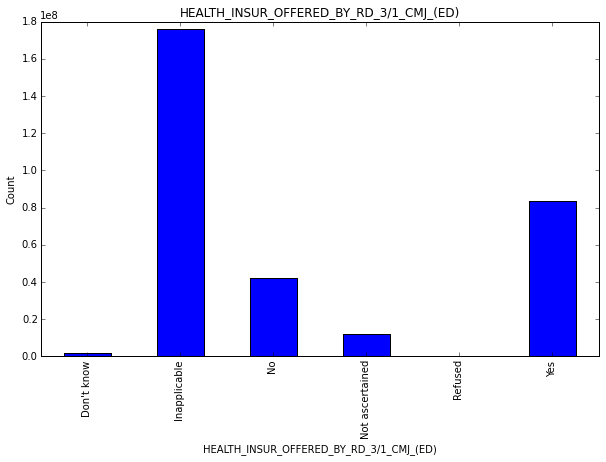

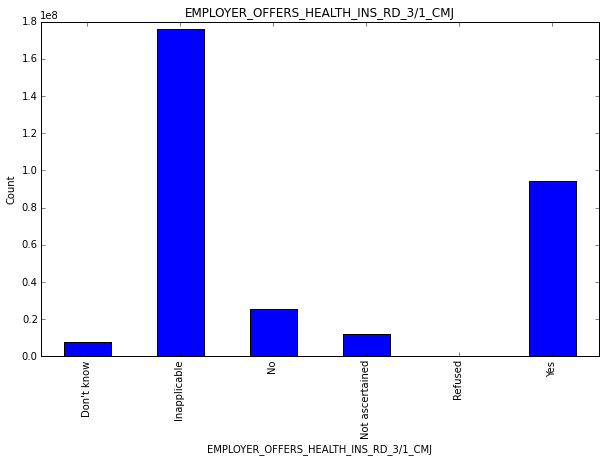

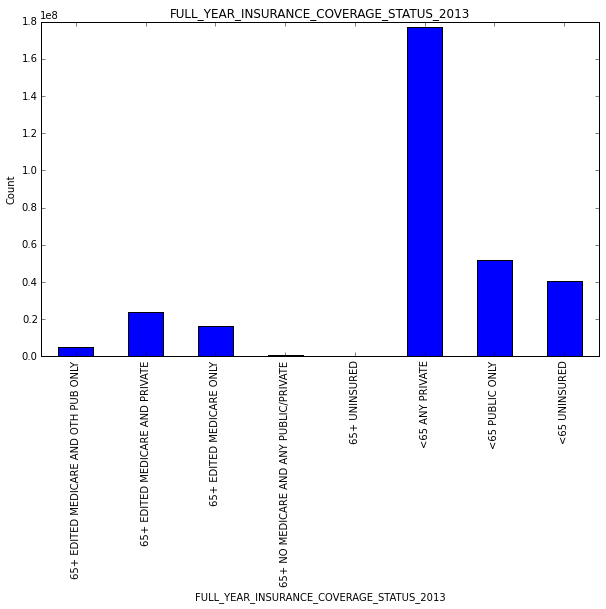

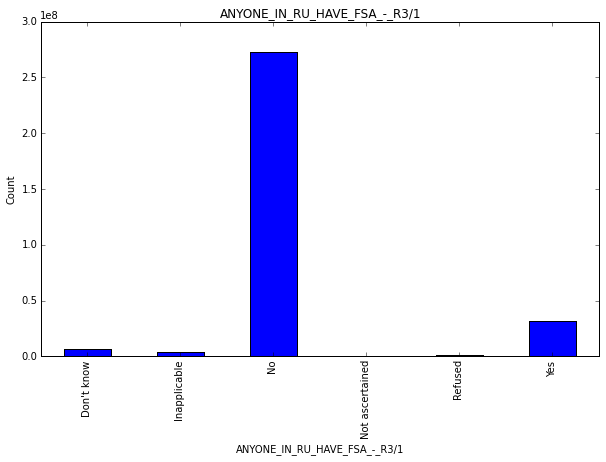

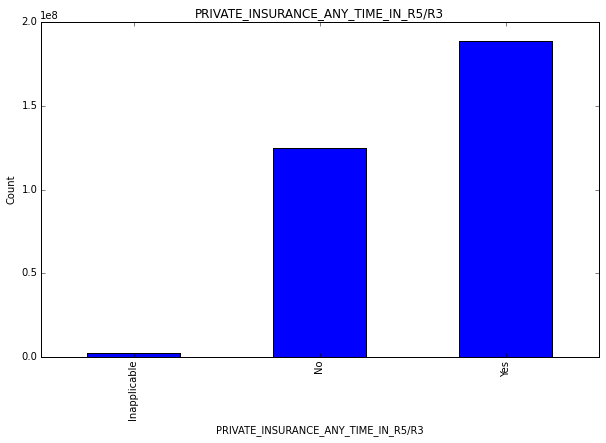

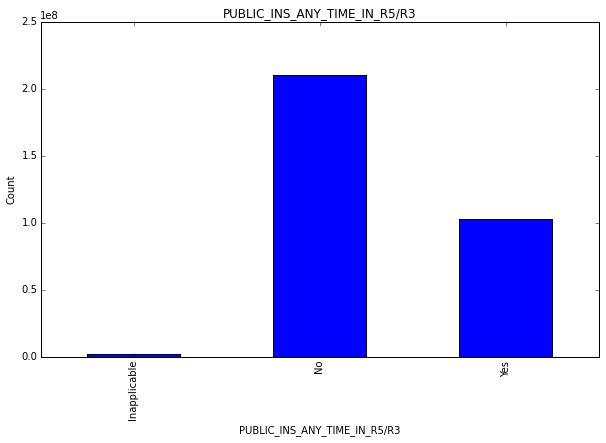

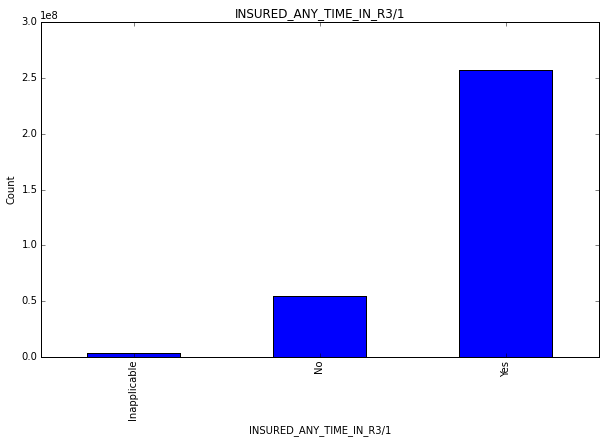

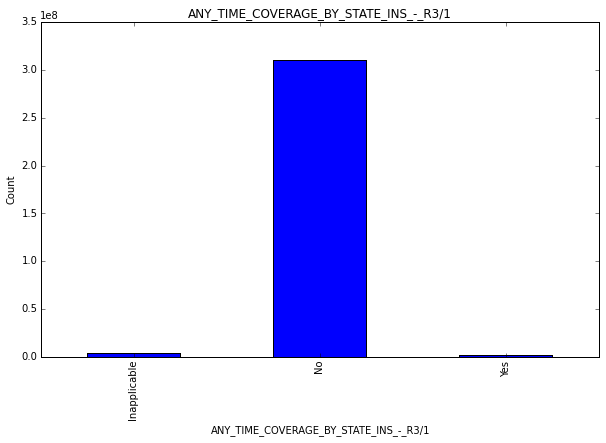

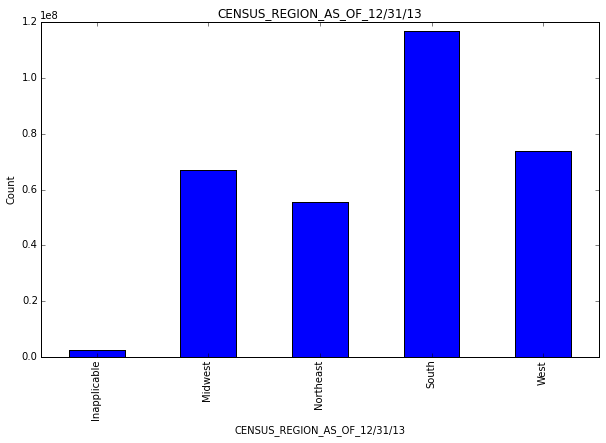

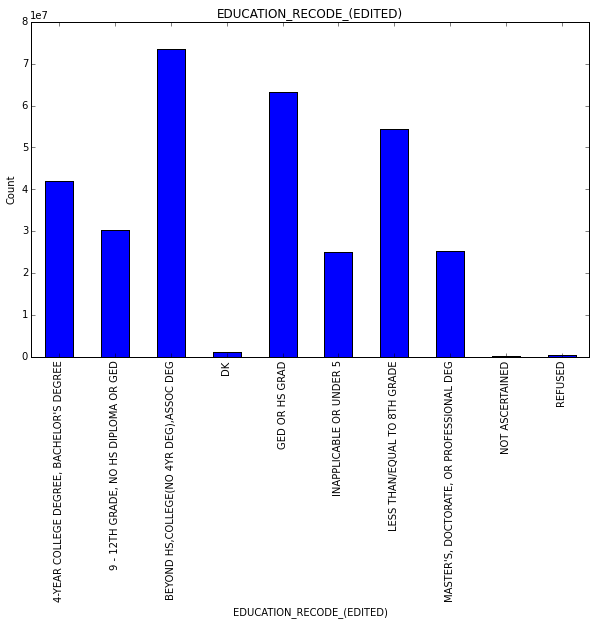

In [11]:
for term in demog:
    explore(data,term)

About the demographic/socio-economic features:

1. The male/female subpopulations are evenly balanced in the population, with slightly more women than men.
2. The race/ethnicity distribution is consistent with other surveys.
3. The distribution estimates that about 70m poeple are under 16, a similar number has never been married, about 130m people are married.
4. About 150m people were employed when the survey was conducted. About 100m people are not employed (not in the labor force, or unemployed). This is consistent with reported [data](http://www.bls.gov/news.release/empsit.t01.htm) elsewhere. About 20m people are self employed, and about 10m people hold more than one job.
5. Remarkably few people - less than 50m - have a choice of health plans at work. I'm interested in whether people who have a choice of health plans tend to pay less for healthcare on average, assuming there is any effect coming from encouraging people to think about their purchasing choices on subsequent utilization or on prices paid/negotiated.
6. The modal entry for industry group and occupational group (by far) is inapplicable. This is a constructed feature in the dataset, so I assume this wasn't directly asked of respondents. It's hard to say what this might mean, or if it'll be useful to keep in our model.
7. About 10m people are in a union. It would also be interesting to know whether being part of a union affects utilization or expenditure in any way.
8. About 60m people did not hold health insurance at the time. These numbers are consistent with [pre-ACA uninsured levels](http://www.gallup.com/poll/172403/uninsured-rate-sinks-second-quarter.aspx). 
9. About 80m people were offered health insurance through their employers, and 40m were not.
10. About 180m people under 65 had private insurance coverage during the survey, about 50m people under 65 had only public insurance options, and about 50m people under 65 were uninsured. There were about 20m people over 65 holding a mix of private insurance and medicare, and a similar number with only medicare coverage.
11. About 30m people lived in a household where someone had a flexible spending account. This is about $10\%$ of the population, but FSAs (especially coupled with high-deductible plans) are an interesting demand-side innovation and it would be interesting to understand if this plays a role in determining expenditure.
12. A negligible number of people (relatively speaking) had coverage under a state insurance plan.
13. The distribution of people over census regions is approximately as follows: about 120m in the south, about 75m people in the west, about 65m people in the midwest, and about 60m people in the northeast. 
14. The distibution over educational attainment is as follows: about 70m people have an associate's degree past high school, about 65m have a GED or high school diploma, a little under 60m have an 8th grade qualification or less, about 30m people stopped high school between 9th and 12th grade and do not have a high school diploma, a little over 40m people have a 4-year degree, about 25m people have a masters, doctoral or professional degree, and about 25m people fall into the inapplicable bucket.


Now that we've had a look at the categorical features, let's take a look at the continuous features.

In [12]:
continuous

['AGE_AS_OF_12/31/13_(EDITED/IMPUTED)',
 "FAMILY'S_TOTAL_INCOME",
 'ADULT_BODY_MASS_INDEX_(>17)_-_RD_5/3',
 'AGE_OF_DIAGNOSIS-HIGH_BLOOD_PRESSURE',
 'AGE_OF_DIAGNOSIS-CORONARY_HEART_DISEASE',
 'AGE_OF_DIAGNOSIS-ANGINA',
 'AGE_OF_DIAGNOSIS-HEART_ATTACK(MI)',
 'AGE_OF_DIAGNOSIS-OTHER_HEART_DISEASE',
 'AGE_OF_DIAGNOSIS-STROKE',
 'AGE_OF_DIAGNOSIS-EMPHYSEMA',
 'AGE_OF_DIAGNOSIS-HIGH_CHOLESTEROL',
 'AGE_OF_DIAGNOSIS-DIABETES',
 'AGE_OF_DIAGNOSIS-ARTHRITIS',
 'AGE_OF_DIAGNOSIS-ASTHMA',
 'AGE_OF_DIAGNOSIS-ADHD/ADD',
 '#_WKS/MON_WOUT_HLTH_INS_PRV_YR-PN_18_ONL',
 '#_OFFICE-BASED_PROVIDER_VISITS_13',
 '#_OUTPATIENT_DEPT_PROVIDER_VISITS_13',
 '#_EMERGENCY_ROOM_VISITS_13',
 '#_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013',
 'FINAL_PERSON_WEIGHT_2013',
 'TOTAL_OFFICE-BASED_EXP_13',
 'TOTAL_OUTPATIENT_PROVIDER_EXP_13',
 'TOT_HOSP_IP_FACILITY_+_DR_EXP_13',
 'TOTAL_ER_FACILITY_+_DR_EXP_13']

There are broadly speaking, continuous variables in the following categories: ages, income levels, time since some event, number of occurences of an event, and total expenditures.

Let's group these variables:

In [13]:
age=[term for term in continuous if "AGE_AS" in term]
age_diagnosed=[term for term in continuous if "AGE_OF" in term]
bmi=[term for term in continuous if "ADULT" in term and "BODY" in term and "MASS" in term]
incomes=[term for term in continuous if "FAMILY" in term and "INCOME" in term]
durations=['#_WKS/MON_WOUT_HLTH_INS_PRV_YR-PN_18_ONL']
utilizations=[term for term in continuous if "#" in term and "WKS" not in term]
expenditures=['TOTAL_OFFICE-BASED_EXP_13',
              'TOTAL_OUTPATIENT_PROVIDER_EXP_13',
              'TOT_HOSP_IP_FACILITY_+_DR_EXP_13',
              'TOTAL_ER_FACILITY_+_DR_EXP_13'
             ]
    
    

Let's look at the ages first.

The documentation only mentions that the value $-1$ is recorded for age when there is no valid data collected and no imputation can reasonably be made. In the following graph I'll censor this level, since there's not really a good way to interpret this that I can think of. I will probably also leave it out when building the model.

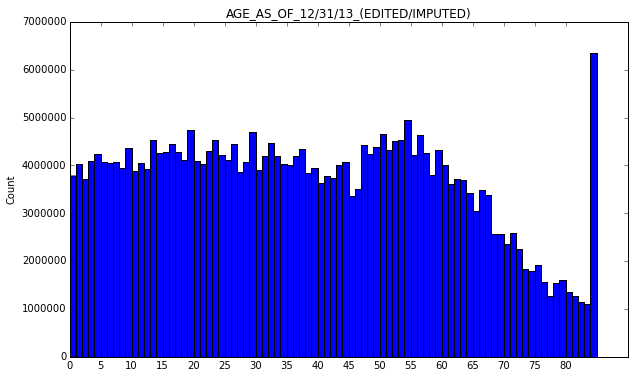

In [14]:
for term in age:
    bins=sorted(data[term][data[term]>=0].unique())
    ax=data[term][data[term]>=0].plot(kind="hist",bins=bins,title=term,xticks=range(min(bins),max(bins),5), 
                                      weights=data["FINAL_PERSON_WEIGHT_2013"][data[term]>=0])
    ax.set_ylabel("Count")
    plt.show()

The first thing to notice is the huge mass at 85. There aren't actually over 6m people in the country of age exactly 85; the data is top-coded at this value to preserve respondent privacy. This means I won't be able to build a model that discriminates on age past 85, and I'll just have to lump everyone older than that into the same bucket. I'll hopefully be able to get a reasonable cross section of that subpopulation using other features.

Next let's look at the age of diagnosis features. Since most people don't *have* chronic illnesses of these types, the mass at -1 dominates the distribution. Accordingly, I'm going to censor those points in these plots, so each of these distributions are conditional on having that chronic condition.

Here's a modified function from the last post for producing histograms with weighted data.

In [15]:
def zoom_hist(thevar, therange,bin_width=100, xticks=None):
    '''wrapper around df.hist'''
    temp=data[[thevar]+["FINAL_PERSON_WEIGHT_2013"]]
    bins=range(therange[0],therange[1],bin_width)
    ax=temp[thevar].hist(bins=bins,range=therange, weights=temp["FINAL_PERSON_WEIGHT_2013"])
    ax.set_title("%s between %s and %s, bin width is %s"%(thevar,therange[0],therange[1],bin_width))
    ax.set_xlabel(thevar)
    ax.set_ylabel("Count")
    if xticks is not None:
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks, rotation="vertical")
    plt.show()

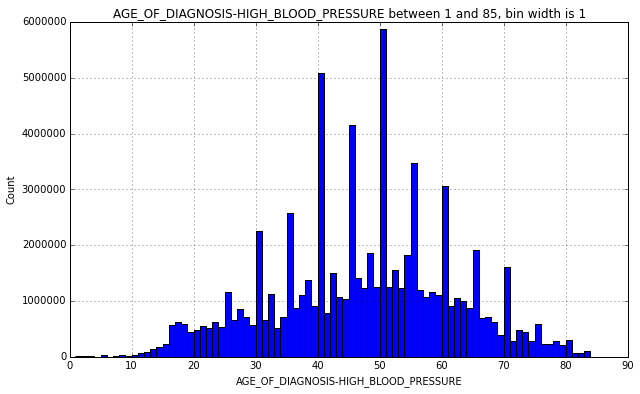

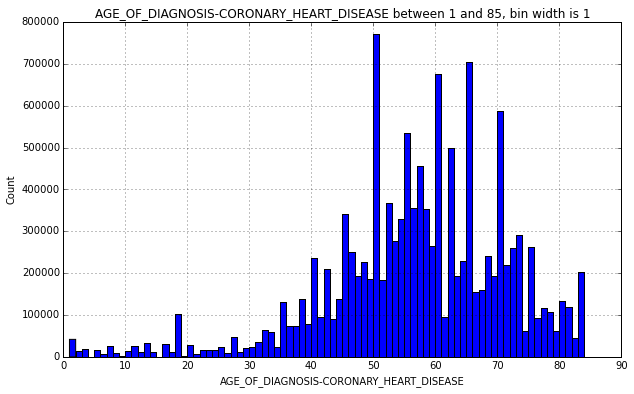

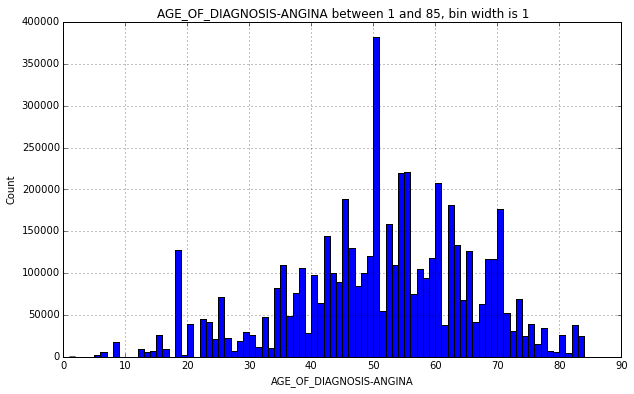

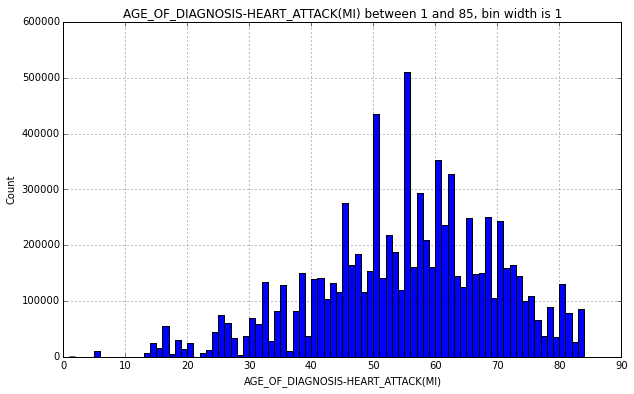

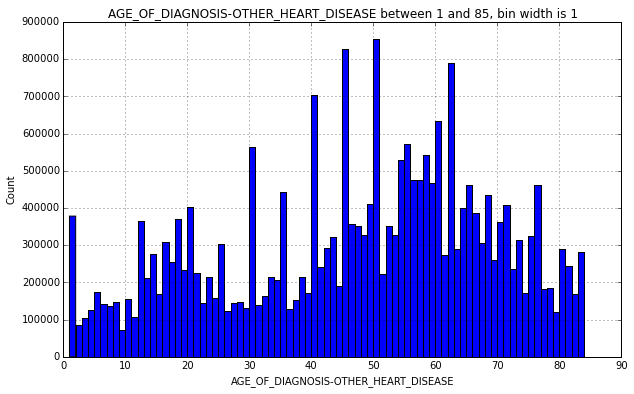

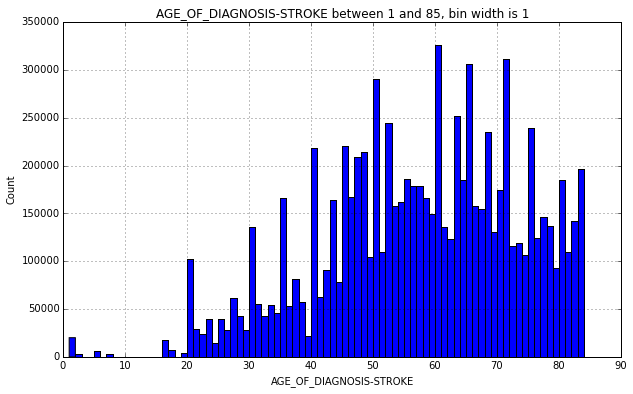

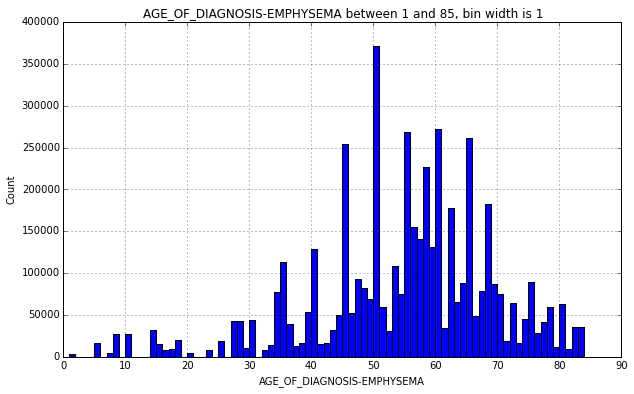

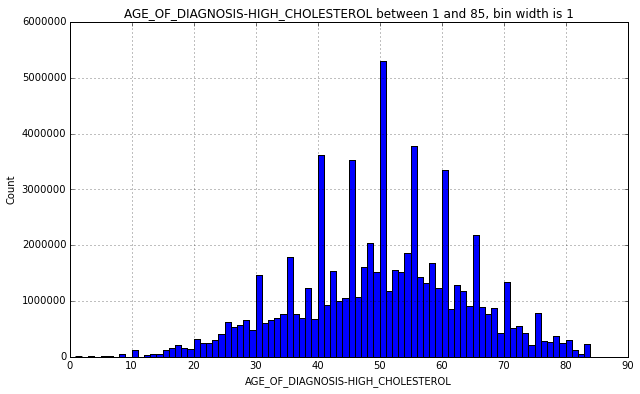

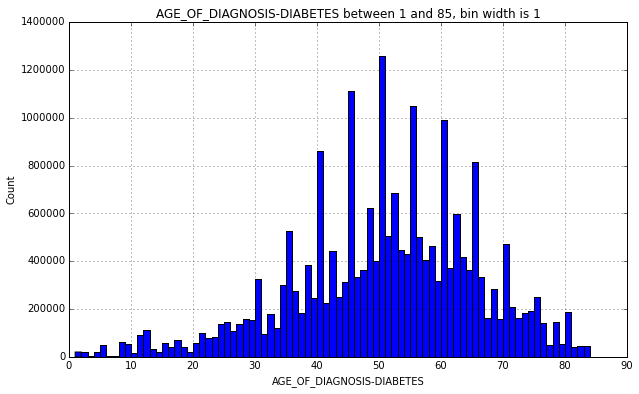

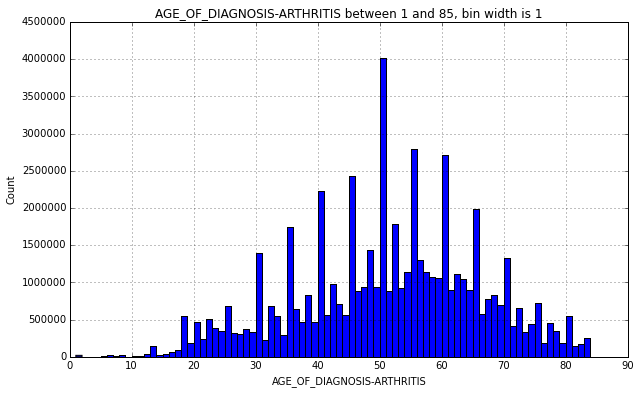

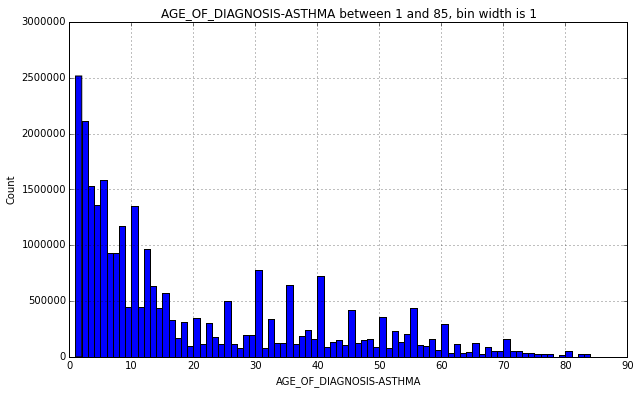

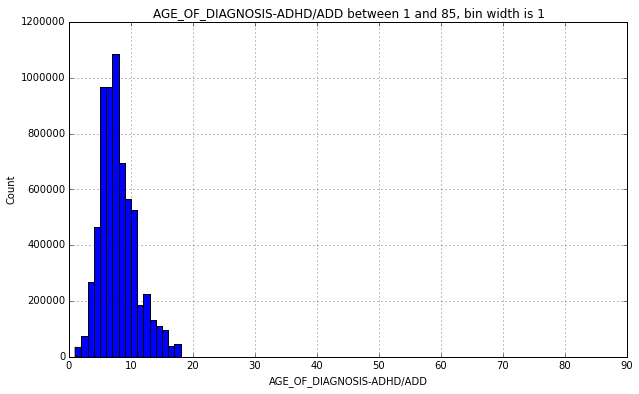

In [16]:
for term in age_diagnosed:
    zoom_hist(term,therange=[1,85],bin_width=1)

1. The "lifestyle" diseases: heart attack, angina, high blood pressure, coronary heart disease, stroke, emphysema, high cholesterol, and diabetes all follow very similar distributions, which are all not-quite normal, with modes in the 50-60 range, and with some right skew.
2.  It will be interesting to look at correlations between these lifestyle disease features. I don't know a priori if this should be high or low, but I would imagine that having multiple comorbidities would be predictive of higher expenditure on healthcare.
3. Arthritis follows a similar distribution to the lifestyle diseases.
4. Asthma is very heavily skewed left, and is most diagnosed at very young ages, with the diagnosis rate trailing off as the population gets older.
5. The age of diagnosis for ADD/ADHD is very tightly clustered in the 0-20 range, with a bell shaped distribution, non-existent tails, and some skew to the left.
6. A generally interesting hypothesis about the relationship between expenditure and the age of diagnosis of any of these diseases may be that the earlier the diagnosis, the better the patient is at making lifestyle changes that can mitigate expenditure levels. It might be interesting to see if this holds up in the modeling.


Let's look at BMI.


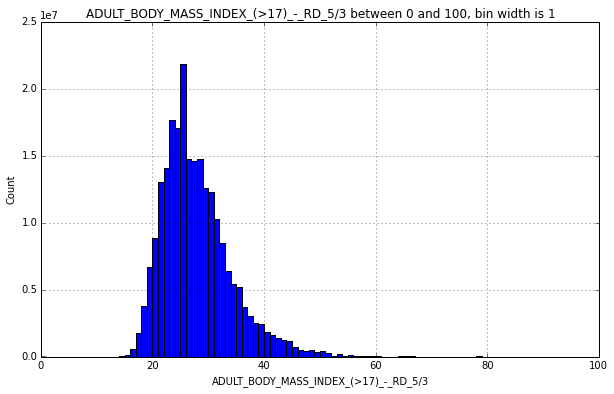

In [17]:
for term in bmi:
    zoom_hist(term,therange=[0,100],bin_width=1)

The BMI (body mass index) is computed by dividing a person's weight in pounds by their squared height in square inches and multiplying by 703.

Here's how to interpret the adult body mass index according to the [CDC guidelines for interpretation](http://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#InterpretedAdults).

The distribution of BMI in the population is estimated by this histogram to be bell-shaped, with a heavier right tail, and centered around 25 or so. 

Next, on to the income variable:

In [18]:
for term in incomes:
    print(data[term].describe())

count     36940.000000
mean      58199.456984
std       56276.325042
min     -258220.000000
25%       20000.000000
50%       41207.000000
75%       79400.000000
max      543051.000000
Name: FAMILY'S_TOTAL_INCOME, dtype: float64


What's really weird about this is that I see responses below 0; far below 0!

Let's take a closer look.

In [19]:
data[incomes+expenditures][data[incomes[0]]<0]

,FAMILY'S_TOTAL_INCOME,TOTAL_OFFICE-BASED_EXP_13,TOTAL_OUTPATIENT_PROVIDER_EXP_13,TOT_HOSP_IP_FACILITY_+_DR_EXP_13,TOTAL_ER_FACILITY_+_DR_EXP_13
54,-258220,1467,9,0,534
55,-258220,0,0,0,0
4843,-3005,0,0,0,0
4844,-3005,37,0,0,622
8200,-1500,2815,0,0,1146
27520,-2196,0,0,0,0


Thankfully there are not many data points here. An important question is how to interpret an income of $-258220$. The smaller values for negative incomes are also interesting - are these reported after something like adjusting for public assistance by the respondents? 

Let's take a look at the survey documentation.

    FAMINC13 contains total family income for each person’s CPS family. Family income was derived by constructing person-level total income comprising annual earnings from wages, salaries, bonuses, tips, commissions; business and farm gains and losses; unemployment and workers’ compensation; interest and dividends; alimony, child support, and other private cash transfers; private pensions, IRA withdrawals, social security, and veterans payments; supplemental security income and cash welfare payments from public assistance, Temporary Assistance for Needy Families, and related programs; gains or losses from estates, trusts, partnerships, S corporations, rent, and royalties; and a small amount of “other” income. Person-level income excluded tax refunds and capital gains. Person-level income totals were then summed over family members, as defined by CPSFAMID, to yield CPS family-level total income (FAMINC13). 
    
Looking at the expenditure features, there's nothing particularly outlandish about these records apart from the incomes. Given this, I think I'm inclined to go by: "when in doubt, throw it out" when it comes to these data points.

Let's truncate at 0 and take a look at the shape of the distribution.

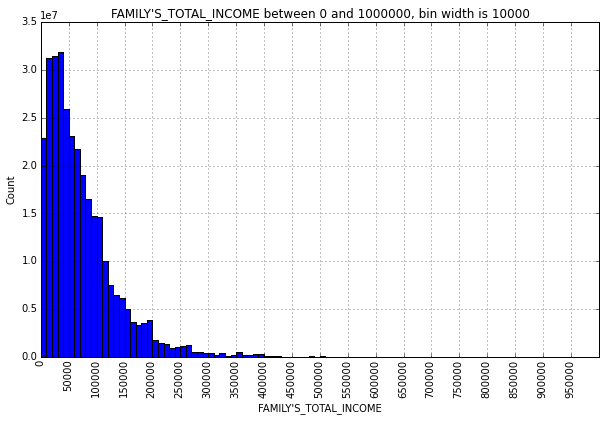

In [20]:
for term in incomes:
    zoom_hist(term,therange=[0,1000000],bin_width=10000,xticks=range(0,1000000,50000))

The distribution is unimodal (mode around $\$50,000$), and with most of the mass concentrated between $\$0$ and $\$200,000$, and a thin (but very well off!) tail past that point.

Let's move on to the durations variables. 

In [21]:
data[durations].describe()

,#_WKS/MON_WOUT_HLTH_INS_PRV_YR-PN_18_ONL
count,36940.000000
mean,-0.899729
std,1.303947
min,-9.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,52.000000


In [22]:
data[durations[0]].value_counts()

-1     36508
 12       81
 6        49
 4        42
 3        37
 2        36
 10       24
 5        24
 8        24
 1        21
 7        20
 9        14
 11       14
-8        11
 0        11
 52        7
 18        5
 40        4
-9         2
 26        2
 30        1
 43        1
 36        1
-7         1
dtype: int64

Since the majority of respondents *did* carry insurance in the previous year, I'll drop the points at -1 to get a sense of the distribution conditional on not being insured.

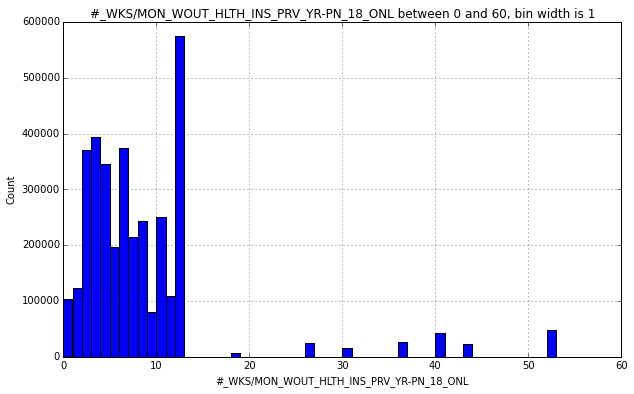

In [23]:
for term in durations:
    zoom_hist(term,therange=[0,60],bin_width=1)

This is quite interesting. Here's what the documentation has to say about this feature:

    For persons who were covered by health insurance on January 1st, it was ascertained if they were ever without health insurance in the previous year (NOINSBEF). The number of weeks/months without health insurance was also ascertained (NOINSTM, NOINUNIT). 
    
I'm interested to know if this feature might be predictive of expenditure. It's hard to say - going a long time without insurance might be reflective of being unemployed, or if the respondent did have the means to buy insurance, may be a proxy for their (lack of) demand for risk mitigation. If either of these correlations hold, this might say something about the effect of either bargaining position, or risk tolerance, on propensity to spend.

Next, the utilization features:

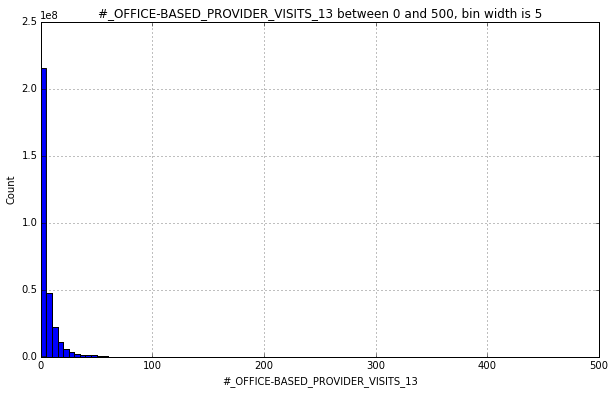

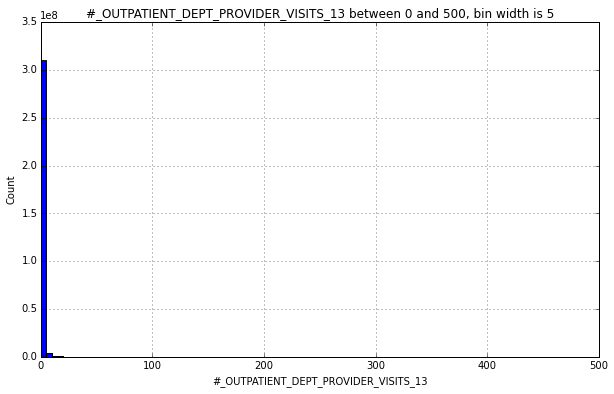

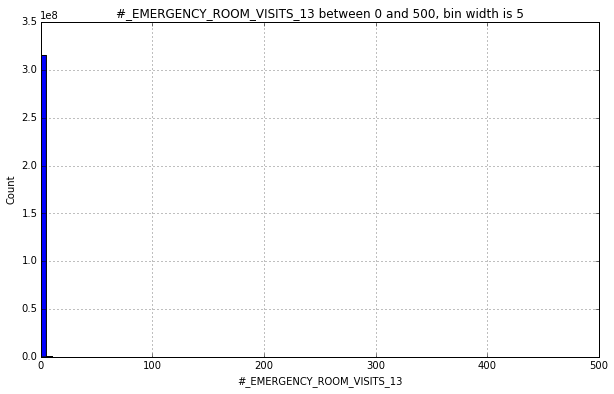

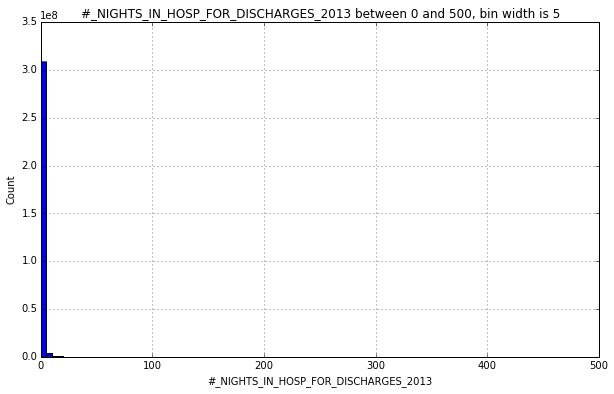

In [24]:
for term in utilizations:
    zoom_hist(term,therange=[0,500],bin_width=5)

It seems clear that most people use relatively little healthcare. Let's confirm if a lot of these utilizations are at 0.

In [25]:
for term in utilizations:
    print(data[term].describe(),"\n")

count    36940.000000
mean         4.454548
std          9.982592
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max        277.000000
Name: #_OFFICE-BASED_PROVIDER_VISITS_13, dtype: float64 

count    36940.000000
mean         0.353952
std          2.373837
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        171.000000
Name: #_OUTPATIENT_DEPT_PROVIDER_VISITS_13, dtype: float64 

count    36940.000000
mean         0.203303
std          0.633602
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: #_EMERGENCY_ROOM_VISITS_13, dtype: float64 

count    36940.000000
mean         0.408663
std          3.817236
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        209.000000
Name: #_NIGHTS_IN_HOSP_FOR_DISCHARGES_2013, dtype: float64 



That's definitely the case. Let's see what the distributions look like conditional on positive utilization.

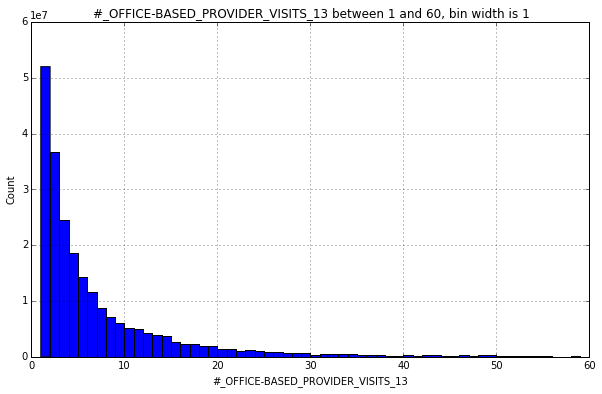

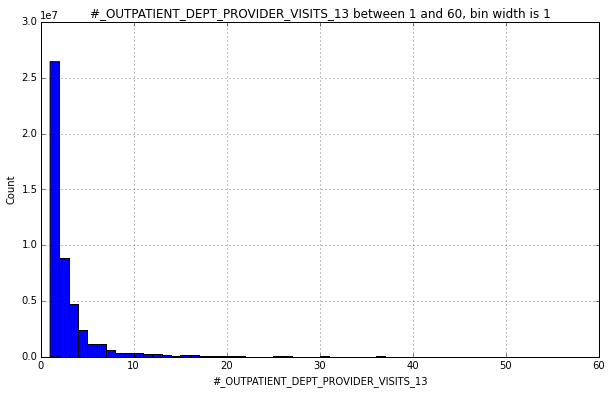

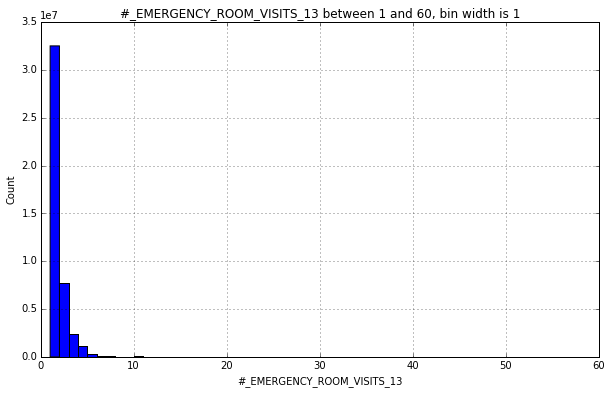

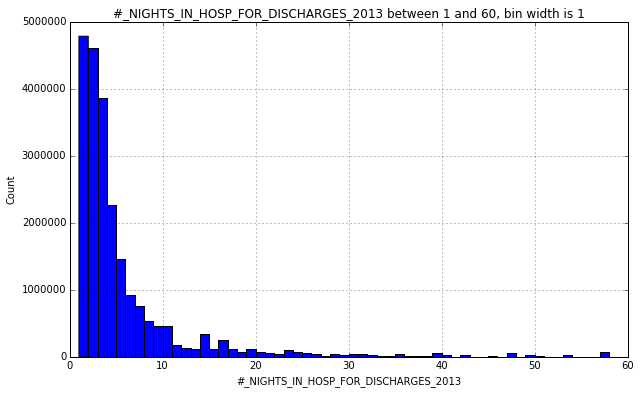

In [26]:
for term in utilizations:
    zoom_hist(term,therange=[1,60],bin_width=1)

These distributions all look very similar; the modal positive utilization level is one visit, and utilization rapidly decays, although there are very heavy tails for office based services and inpatient services (we've noticed this already in the expenditure features for these categories).

The main difference between these categories is the degree of use. For example, the number of people in the modal office visit level is over 50m, for outpatient and ER is about 30m, and for inpatient nights is about 5m.

Similar pictures in this case.

We've already looked at the patterns in expenditure, so this takes us to the end of the continuous variables we want to look at.

The next thing I'd like to do is to take a closer look at the features to check for bivariate relationships. Do specific diagnoses determine higher levels of expenditure? Do people who make more money pay more for healthcare? If there is such a relationship, is it linear? Is the growth faster or slower than linear? Do certain diagnoses, while not individually affecting expenditure much, combine to have a large effect, perhaps larger than the sum of their individual pieces?

Looking more closely at the data will, I hope, help me validate or refute interesting hypotheses like these, and possibly generate many more. The first step is to try and visualize the possible relationships, which will be in the next post.